<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/14_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%95%9C%EA%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# colab에서 matplotlib 한글화할 때 
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

In [1]:
# pandas = numpy + dict 형
           # ndim, shape, dtypes, values(), keys(), items()
# Series, DataFrame
# 열중심
# 함수를 적용 / transformation : apply(열별, 행별로 적용), applymap(요소에 대해서 적용), map(Series에 적용)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
data = pd.Series([1, np.nan,'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [3]:
data.isnull()
# 데이터 마다 T . F 

data.isnull().sum()
# T이면 1이니까 T 인 것의 개수를 알 수 있음.

2

In [4]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [5]:
data.dropna()


0        1
2    hello
dtype: object

In [6]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [7]:
# 없애고 싶으면 
data = data.dropna()
data

0        1
2    hello
dtype: object

In [8]:
df = pd.DataFrame([[1,     np.nan, 2],
                   [2,     3,      5],
                   [np.nan,4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [9]:
df.dropna()
# df.dropna(axis=0) 같은 의미 
# 디폴트 : axis=0
# na 값이 있는 행이 제거됨.
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [10]:
df.dropna(axis=1)
# na 값이 있는 열이 제거됨.

,2
0,2
1,5
2,6


In [11]:
# 3열을 전부 na 처리
df[3] = np.nan
df
df.dropna(axis='columns', how='all')  #  열의 모든 성분이 na 이면 제거하라는 의미  --> 3열이 제거됨.

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [12]:
df.fillna(0)    # na 값이 0으로 채워짐.

,0,1,2,3
0,1.0,0.0,2,0.0
1,2.0,3.0,5,0.0
2,0.0,4.0,6,0.0


In [13]:
data.fillna(method='bfill')         # "bfill"은 "backward fill"의 약어로, "뒤쪽 채우기"를 의미
df.fillna(method='ffill', axis=1)   # "ffill"은 "forward fill"의 약어로, "앞쪽 채우기"를 의미

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [14]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


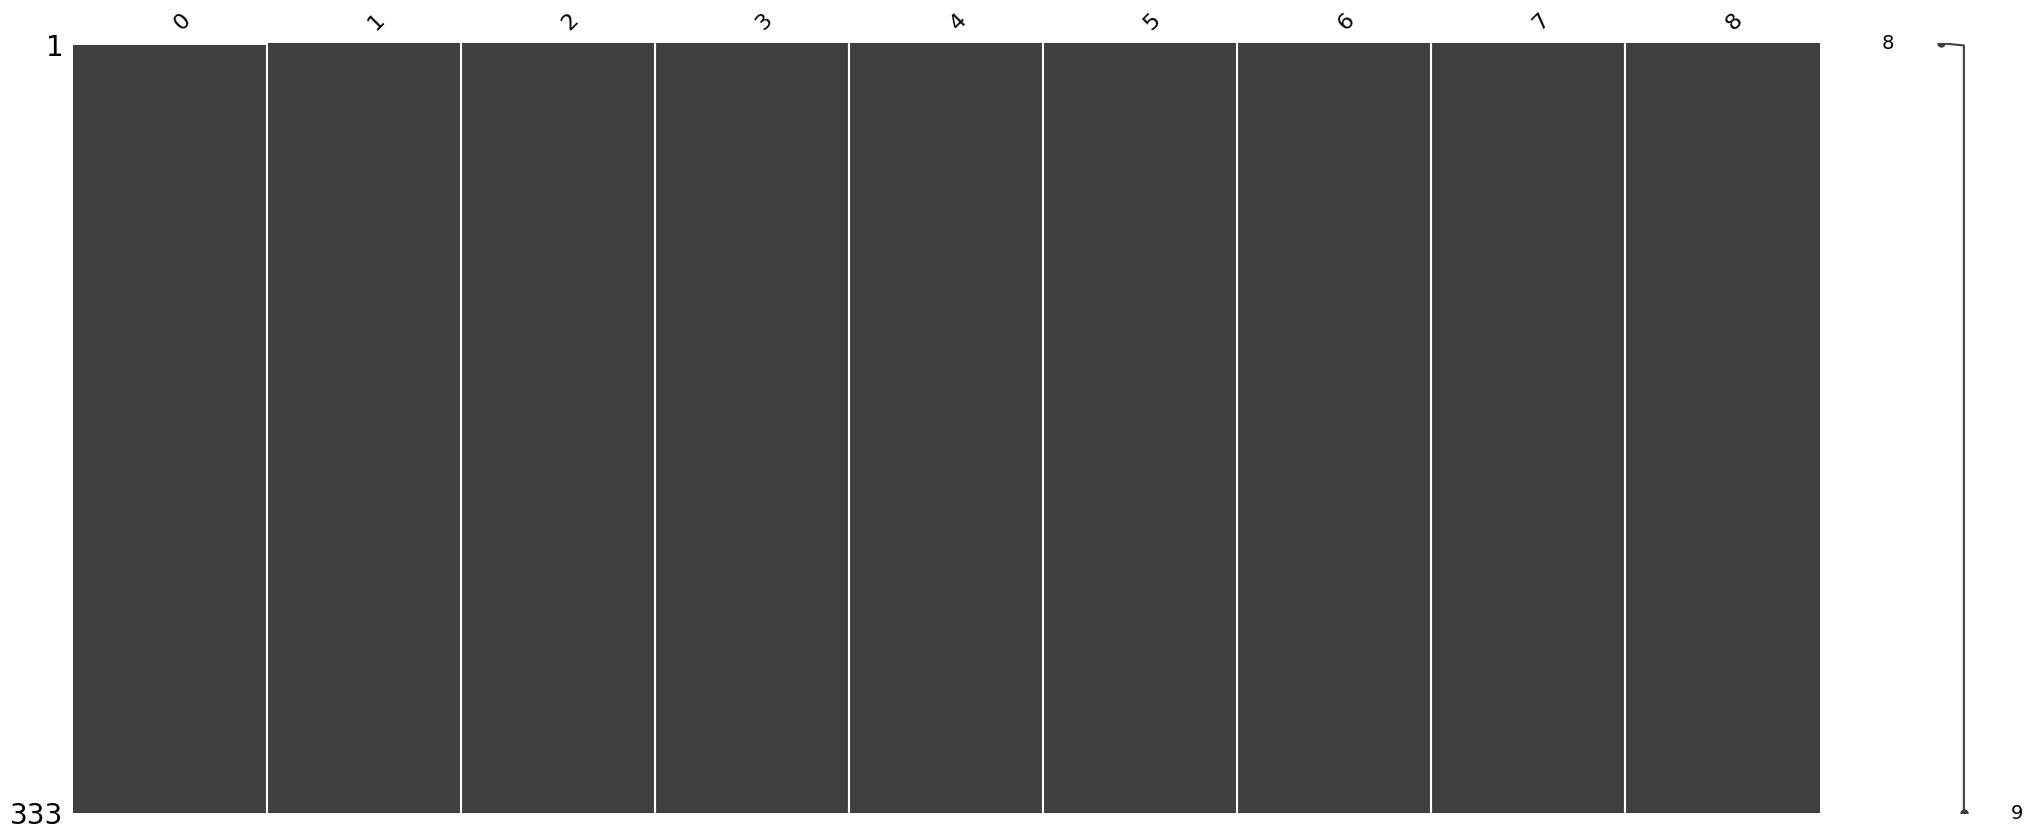

In [31]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/pima.csv',header = None)
msno.matrix(df)
plt.show()

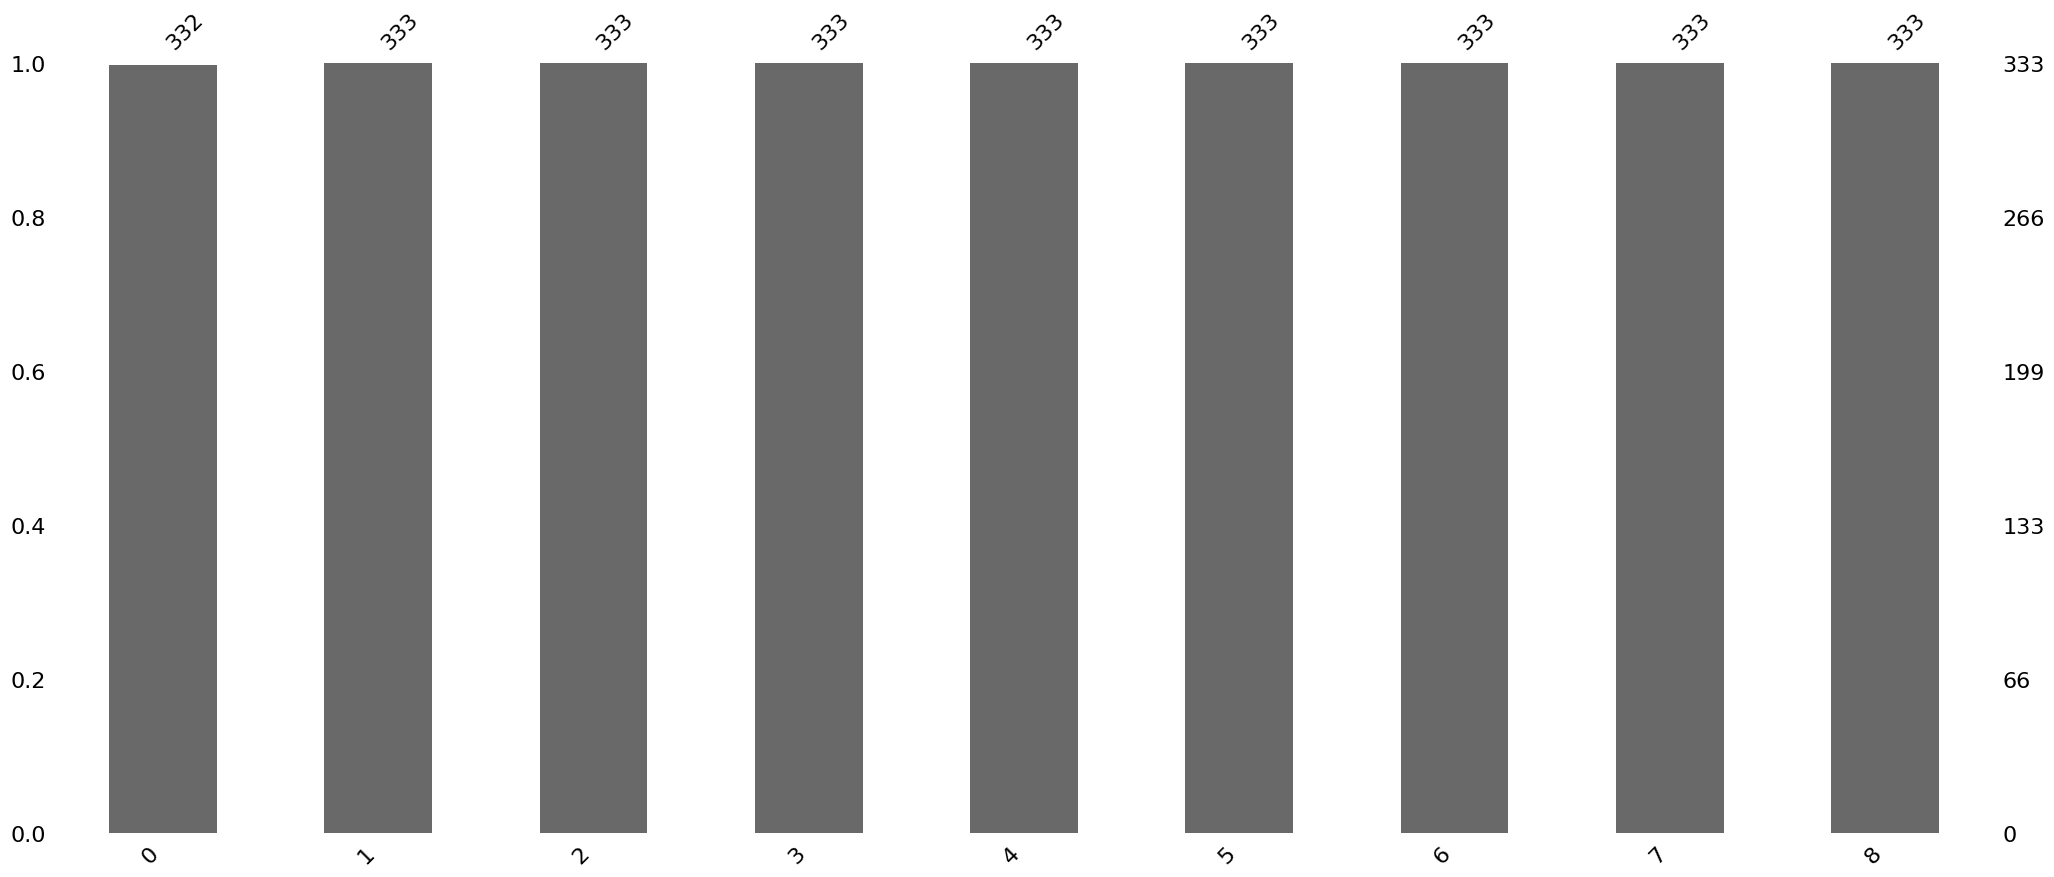

In [32]:
msno.bar(df)
plt.show()
# 첫번째만 332개로 결측치가 있음 --> 1개 삭제 

In [33]:
df.dropna().shape   # chaining

(332, 9)

In [34]:
df.describe()

,0
count,332.000000
mean,166.500000
std,95.984374
min,1.000000
25%,83.750000
50%,166.500000
75%,249.250000
max,332.000000


In [35]:
df.head(5)

,0,1,2,3,4,5,6,7,8
0,NaN,npreg,glu,bp,skin,bmi,ped,age,type
1,1.0,6,148,72,35,33.6,0.627,50,Yes
2,2.0,1,85,66,29,26.6,0.351,31,No
3,3.0,1,89,66,23,28.1,0.167,21,No
4,4.0,3,78,50,32,31,0.248,26,Yes


In [36]:
df[[1,2,3,4,5]]  # select

,1,2,3,4,5
0,npreg,glu,bp,skin,bmi
1,6,148,72,35,33.6
2,1,85,66,29,26.6
3,1,89,66,23,28.1
4,3,78,50,32,31
...,...,...,...,...,...
328,2,88,58,26,28.4
329,9,170,74,31,44
330,10,101,76,48,32.9
331,5,121,72,23,26.2


In [37]:
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.NaN)

In [38]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')   # SimpleImputer : 객체 생성
# x=[[1,2],[np.nan,3],[7,6]]
imp.fit([[1,2,3],[np.nan,3,3],[7,6,3]])     # 3X3 행렬 적합했다.
X = [[np.nan,2,3], [4,np.nan,6],[10,np.nan,9]]
print(imp.transform(X))  # 변형 -> 적용

[[ 4.          2.          3.        ]
 [ 4.          3.66666667  6.        ]
 [10.          3.66666667  9.        ]]


In [39]:
np.random.seed(12345)
data = pd.DataFrame(np.random.randn(100,4))   # 100X4 행렬 생성
print(data.describe())
col=data[3]

                0           1           2           3
count  100.000000  100.000000  100.000000  100.000000
mean    -0.142766    0.099733    0.063021   -0.076623
std      0.995497    0.918984    1.057519    1.100933
min     -2.557934   -1.860761   -2.644409   -2.420294
25%     -0.788723   -0.571684   -0.699515   -0.773203
50%     -0.256996    0.111051    0.064969   -0.230874
75%      0.637665    0.711930    0.730487    0.624688
max      2.212303    2.613999    3.248944    3.927528


In [40]:
print(col[np.abs(col)>3])
data[(np.abs(data)>3).any(1)]  # 절댓값 3보다 큰 데이터가 하나라도 있으면
# filtering
data[np.abs(data)>3] = np.sign(data)*3   # 부호를 가진 값으로 3으로 제한
data.describe()

97    3.927528
Name: 3, dtype: float64


<ipython-input-40-f0a81cd010be>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data[(np.abs(data)>3).any(1)]  # 절댓값 3보다 큰 데이터가 하나라도 있으면


,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,-0.142766,0.099733,0.060532,-0.085898
std,0.995497,0.918984,1.050212,1.070339
min,-2.557934,-1.860761,-2.644409,-2.420294
25%,-0.788723,-0.571684,-0.699515,-0.773203
50%,-0.256996,0.111051,0.064969,-0.230874
75%,0.637665,0.711930,0.730487,0.624688
max,2.212303,2.613999,3.000000,3.000000


In [41]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.DataFrame({'key': [1,1,1,1,1000,1,1,1,1],
                   'data1':[1,1,1,1,1,1,1,1,20000]})
df

,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
4,1000,1
5,1,1
6,1,1
7,1,1
8,1,20000


In [42]:
z_scores = stats.zscore(df)   # 데이터를 z점수화 시킴 => 표준정규분포 
print(z_scores)
abs_z_scores = np.abs(z_scores)   # 1000, 20000과 같은 이상치를 표준화시키면 --> 2.828427 / 2.828427 --> 표준편차의 3배수가 안 됨.
filtered_entries = (abs_z_scores < 3).all(axis=1)  
new_df = df[filtered_entries]
new_df

        key     data1
0 -0.353553 -0.353553
1 -0.353553 -0.353553
2 -0.353553 -0.353553
3 -0.353553 -0.353553
4  2.828427 -0.353553
5 -0.353553 -0.353553
6 -0.353553 -0.353553
7 -0.353553 -0.353553
8 -0.353553  2.828427


,key,data1
0,1,1
1,1,1
2,1,1
3,1,1
4,1000,1
5,1,1
6,1,1
7,1,1
8,1,20000


In [43]:
# 표준편차의 3배수 이상인 값을 이상치로 봄.
# 원래 데이터에서 1개가 제거됨.
df = pd.DataFrame({'Data' : np.random.normal(size=200)})
print(df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())])

         Data
0    0.941571
1    0.533364
2    0.356266
3   -0.010115
4    1.415753
..        ...
195 -0.126072
196  0.398205
197  0.141638
198 -0.264141
199 -0.452212

[198 rows x 1 columns]


## 사분위수 정규화

In [44]:
df = pd.DataFrame({'Data':np.random.normal(size=200)})
print(df.describe())

q_low = df.iloc[:,0].quantile(0.01)  # 백분위수 중에서 1분위수, 99분위수를 넘어가면 이상치로 생각
q_hi = df.iloc[:,0].quantile(0.99)
print("하한값", q_low)
print("상한값", q_hi)

df_filtered = df[(df.iloc[:,0]<q_hi) & (df.iloc[:,0] > q_low)]
print("정상 데이터", len(df_filtered))
df_filtered.head()


             Data
count  200.000000
mean     0.018621
std      0.972842
min     -2.868018
25%     -0.669550
50%     -0.023949
75%      0.681768
max      2.666744
하한값 -1.7872584902140518
상한값 2.07030548403248
정상 데이터 196


,Data
0,0.758202
1,-0.515583
2,-0.591202
3,0.896746
4,-0.971438


In [45]:
# 문제
# 비정상 데이터를 출력

df[~((df.iloc[:,0]<q_hi)&(df.iloc[:,0]>q_low))]

,Data
62,-2.868018
167,2.616101
170,-2.018206
172,2.666744


In [46]:
# robust 정규화를 실시
IQR = df.iloc[:,0].quantile(0.75) - df.iloc[:,0].quantile(0.25)
(df-df.median())/IQR

,Data
0,0.578806
1,-0.363819
2,-0.419778
3,0.681331
4,-0.701159
...,...
195,-0.718211
196,0.158245
197,-1.228490
198,-0.321488


In [47]:
from sklearn import preprocessing
df['X_scale'] = preprocessing.scale(df)
df

,Data,X_scale
0,0.758202,0.762135
1,-0.515583,-0.550496
2,-0.591202,-0.628421
3,0.896746,0.904904
4,-0.971438,-1.020252
...,...,...
195,-0.994480,-1.043997
196,0.189890,0.176492
197,-1.684030,-1.754575
198,-0.458381,-0.491549


In [49]:
# 로그변환 제곱근변환

df['X_log']= preprocessing.scale(np.log(df['Data']+1)) # 정규분포화해서 스케일링
df['X_sqrt']=preprocessing.scale(np.sqrt(df['Data']+1))


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 오류

In [ ]:
!pip install mglearn

In [ ]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scale()

## 범주화

In [52]:
df = pd.DataFrame({'value':np.random.randint(0,100,20)})
print(df.shape)   # (20, 1)

# 파이썬의 문자열 출력 방식 
# C 방식(%), C# 방식(format), f 문자열(변수)
labels = ["{0} - {1}".format(i,i+9) for i in range(0,100,10)]
print(labels)
# 불규칙하게 줄 수도 있고, 규칙적으로 줄 수 있음.
#  right = False : 오른쪽이 포함되지 않는다.
df['group'] = pd.cut(df.value, range(0,105,10), right = False, labels=labels)
df.head(10)

(20, 1)
['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']


,value,group
0,44,40 - 49
1,52,50 - 59
2,82,80 - 89
3,70,70 - 79
4,36,30 - 39
5,9,0 - 9
6,72,70 - 79
7,93,90 - 99
8,24,20 - 29
9,61,60 - 69


## 이산 범주화 : ( cut, pcut )을 사용


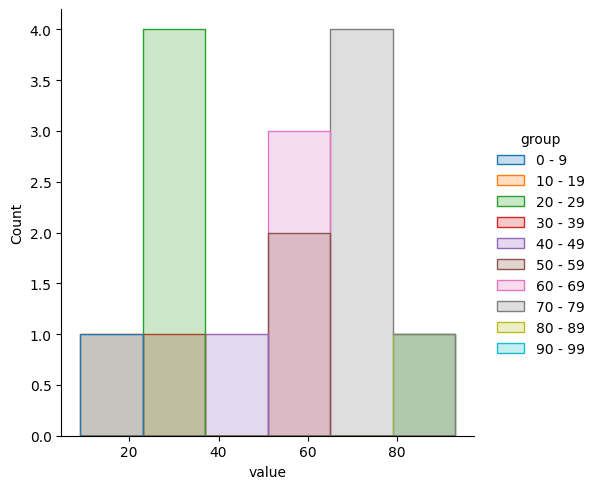

In [53]:
# 일일이 데이터를 시각화하면 산포도
# 범위로 하면 count
# 분석용 시각화 패키지

import seaborn as sns
sns.displot(df, x='value', hue='group', element='step')

In [54]:
# qcut

df = pd.DataFrame({'value':np.random.randint(0,100,20)})
labels = ["{0} - {1}".format(i,i+9) for i in range(0,100,10)]
print(labels)

df['group'] = pd.qcut(df.value, 10, labels=labels)  # 균등하게
df.head(10)

['0 - 9', '10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']


,value,group
0,13,0 - 9
1,64,60 - 69
2,87,80 - 89
3,25,10 - 19
4,27,20 - 29
5,12,0 - 9
6,35,30 - 39
7,53,40 - 49
8,66,60 - 69
9,70,70 - 79


In [55]:
# pandas에서는 category 타입이 있음

s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [56]:
df = pd.DataFrame({"A":["a", "b", "c", "a"], "C":[10,20,30,40]})
df["B"] = df["A"].astype("category")  # 형 변환

0.12.2


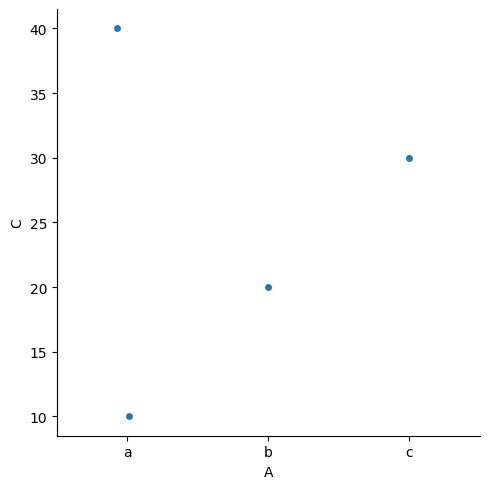

In [57]:
print(sns.__version__)
# sns.factorplot(x='A', y='C', data=df) 오류
# seaborn 패키지의 버전이 업데이트되면서 factorplot 함수가 catplot으로 대체됨. 
sns.catplot(x='A', y='C', data=df)
plt.show()

In [58]:
values = np.array([1,2,1,np.nan])
codes, uniques = pd.factorize(values)
codes

array([ 0,  1,  0, -1])

In [59]:
uniques  # 범주값

array([1., 2.])

In [60]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'], 'data1':range(6)})
print(df)

print(pd.get_dummies(df['key']))  # a,b,c 가 열 : 범주 수 만큼 변수가 증가
dummies=pd.get_dummies(df['key'], prefix='key') # 접두사
print(dummies)

df_with_dummy = df[['data1']].join(dummies)  # 열이름을 기준으로 조인
print(df_with_dummy)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
   a  b  c
0  0  1  0
1  0  1  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0
   key_a  key_b  key_c
0      0      1      0
1      0      1      0
2      1      0      0
3      0      0      1
4      1      0      0
5      0      1      0
   data1  key_a  key_b  key_c
0      0      0      1      0
1      1      0      1      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0


In [65]:
import pandas as pd
from scipy import stats
import numpy as np
df = pd.DataFrame({'key': [1,1,1,1,1000,1,1,1,1],
                   'data1':[1,1,1,1,1,1,1,1,20000]})

In [66]:
import pandas as pd
df =pd.read_csv("/content/drive/MyDrive/cust_mast.csv")
df.shape

(5000, 8)

In [67]:
df.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [68]:
df_nunique = df.nunique()
df_nunique

customer_id          5000
customer_name        5000
registration_date    4951
email                5000
gender                  2
age                    61
birth                4464
pref                    7
dtype: int64

In [69]:
df["customer_name"].value_counts()

김서준     1
최서온     1
최규하     1
최상엽     1
최서완     1
       ..
이에스더    1
이하이     1
이린아     1
이보윤     1
정지석     1
Name: customer_name, Length: 5000, dtype: int64

In [70]:
df["pref"].value_counts(normalize=True) * 100

인천광역시    22.10
대전광역시    19.34
서울특별시    18.54
부산광역시    14.38
대구광역시    10.44
울산광역시     7.64
광주광역시     7.56
Name: pref, dtype: float64

In [71]:
# 데이터 요약 : 범주형 데이터로 요약
pd.crosstab(df["pref"], df["gender"])

gender,F,M
pref,,
광주광역시,208,170
대구광역시,250,272
대전광역시,465,502
부산광역시,347,372
서울특별시,474,453
울산광역시,185,197
인천광역시,556,549


<Axes: xlabel='gender', ylabel='count'>

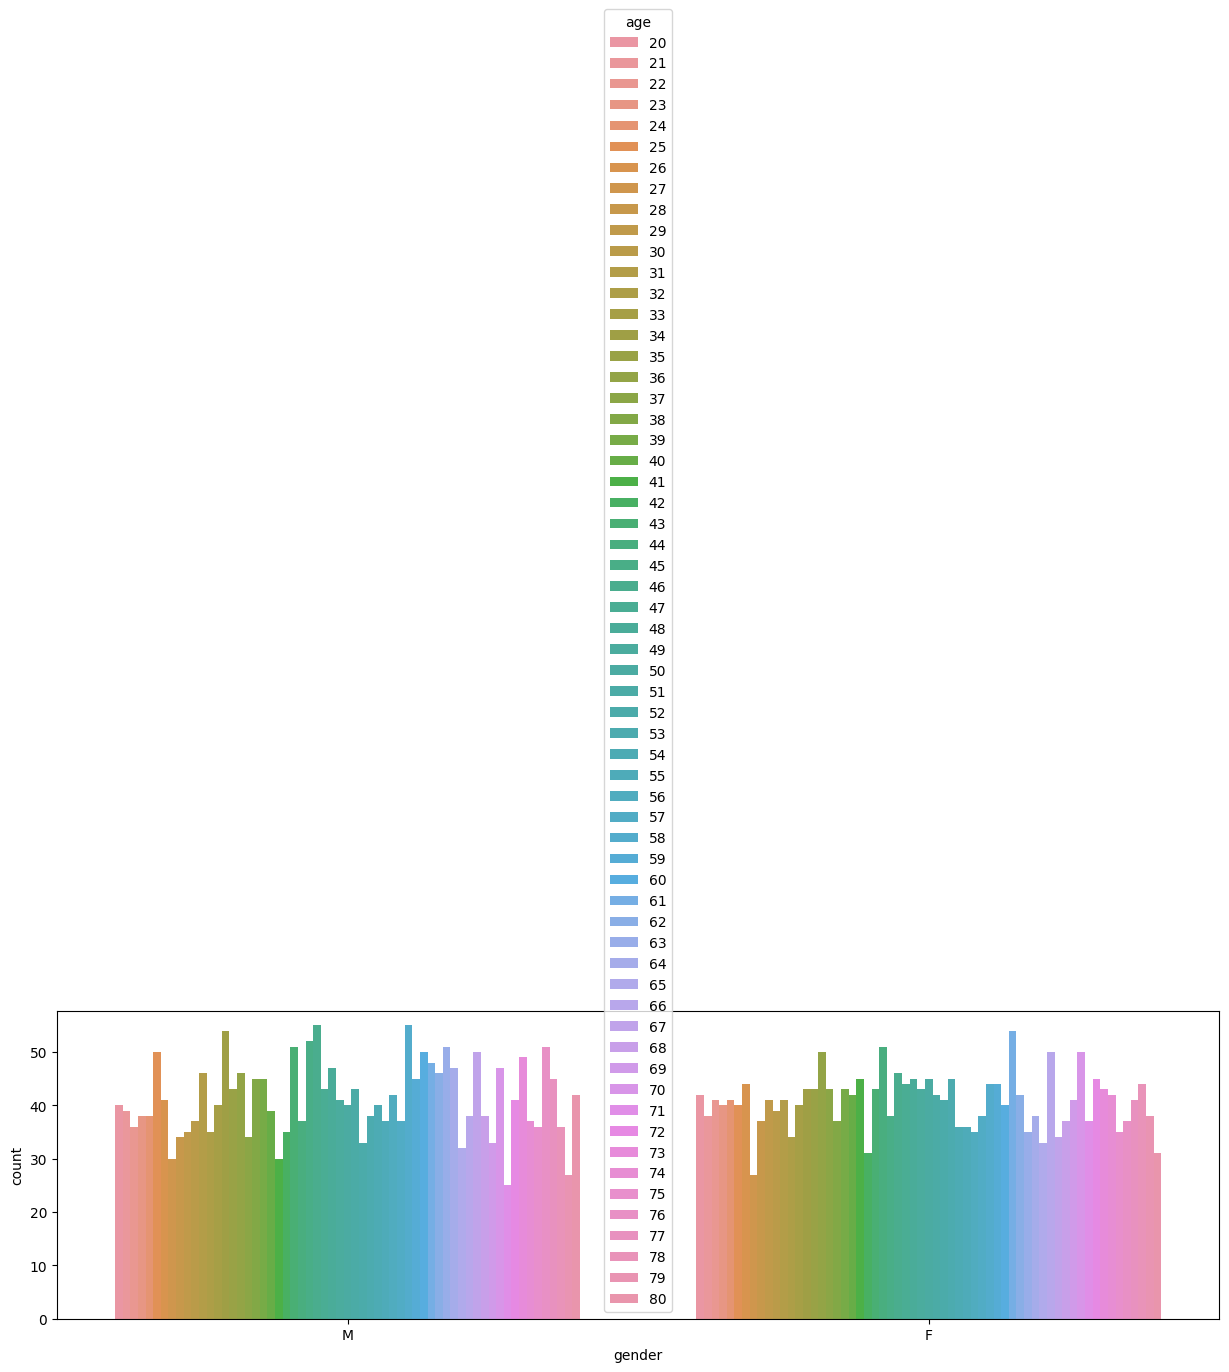

In [72]:
plt.figure(figsize=(15, 4))
# 분석용 시각화 
sns.countplot(data=df, x="gender", hue="age")

In [ ]:
from matplotlib import font_manager, rc
import matplotlib as mpl
# anaconda에서 하는 방식
# f_path = "c:/Windows/Fonts/malgun.ttf"
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

In [64]:
# Colab
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq
# f_path = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

import matplotlib as mpl
# mpl.rcParams['axes.unicode_minus'] = False

In [82]:
# colab에서 matplotlib 한글화할 때 
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

In [ ]:
# pref별로 age를 그룹화 / 5000개가 7 그룹으로 묶일 수 있음 
# 파이썬의 시각화는, 기본적으로 한글을 지원하지 않음 (글꼴을 세팅해야 함)
df.groupby('pref')['age'].mean()  # groupby는 집계 함수와 같이 사용

<Axes: xlabel='pref', ylabel='age'>

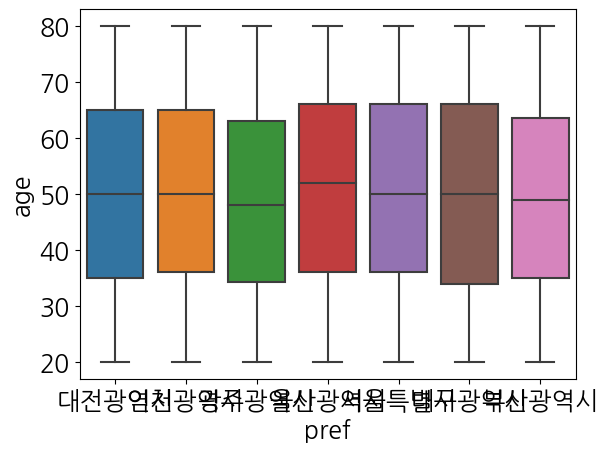

In [83]:
sns.boxplot(data=df, x='pref', y='age')

# 문자열
- pandas의 문자열은 vector 연산을 지원 : 속도가 빠름 

In [78]:
text_tesst = pd.Series(['sky', 'blue', 'earth', 'happy'])
text_tesst.str.upper()  # 대문자로 바꾸기 

0      SKY
1     BLUE
2    EARTH
3    HAPPY
dtype: object

In [75]:
text_tesst.str.lower()  # 소문자로 바꾸기

0      sky
1     blue
2    earth
3    happy
dtype: object

In [76]:
text_tesst.str.len()  # 문자열의 길이(갯수)

0    3
1    4
2    5
3    5
dtype: int64

In [85]:
text_tesst.str.startswith('T')  # 'T'로 시작하는 문자열이 있는지?
# text_tesst.str.startswith('e')  # [2]가 True, 대소문자 구분함 

0    False
1    False
2     True
3    False
dtype: bool

In [86]:
text_tesst.str.split('a')  # split() : 문자열 분리 / 복수 -> 리스트로 출력됨

0       [sky]
1      [blue]
2    [e, rth]
3    [h, ppy]
dtype: object

In [89]:
# Regula expresstion : 정규 표현식 (re)
text_tesst.str.extract('([A-Za-z]+)', expand = False)  # [] : 선택의 의미 

0      sky
1     blue
2    earth
3    happy
dtype: object

In [90]:
# 처음과 끝이 자음으로 시작되는 문자를 찾는 명령어
text_tesst.str.findall(r'^[^AEIOU].*[^aeiou]$')  # ^ : 처음의 의미 / ^[^AEIOU] : 처음에 AEIOU가 아닌 것이 왔을 때 (대괄호 밖 ^은 부정의 의미)

0      [sky]
1         []
2    [earth]
3    [happy]
dtype: object

In [91]:
# vector화 연산, 문자열은 1차원 배열
text_tesst.str[0:3]  # 3글자 가지고오기

0    sky
1    blu
2    ear
3    hap
dtype: object

In [92]:
import re # regular expression (정규 표현식)
text = "에러 1122 : 레퍼런스 오류\n, 에러 1033 : argument 오류"
regex = re.compile("에* 1033")  # regex() : 패턴
mo = regex.search(text)  # 패턴을 문자열에서 탐색
if mo != None:
  print(mo.group())  # 찾은 것이 없으면 None 리턴, 찾았으면 group를 리턴

 1033


In [95]:
text = '문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다. 123-222-2222'
regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')   # 패턴은 공용이다.
regex = re.compile(r'(\d{3})-(\d{3})-(\d{4})')  # []은 선택의 의미, {}은 반복의 의미
matchobj = regex.search(text)
print(matchobj)
phonenumber = matchobj.group()
print(phonenumber)

<re.Match object; span=(10, 22), match='032-232-3245'>
032-232-3245


In [99]:
text = '문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다. 123-222-2222'
# regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
regex = re.compile(r'(\d{3})-(\d{3}-\d{4})')
matchobj = regex.findall(text)
print(matchobj)

[('032', '232-3245'), ('123', '222-2222')]


In [100]:
text = "foo  bar\t  baz  \tquz"
print(re.split('\st+', text))
regex = re.compile('\s+')  # \s가 문자열이고(string), +는 한개 이상인 경우를 의미한다. 

['foo  bar\t  baz  \tquz']


In [101]:
print("데이터 분할: ", regex.split(text))    # \t는 조판기호이기에 처리하지 않음 / 문자열로 나누기
print("데이터 검색: ", regex.findall(text))

데이터 분할:  ['foo', 'bar', 'baz', 'quz']
데이터 검색:  ['  ', '\t  ', '  \t']


In [106]:
# 문제
# _를 기준으로 문자열을 분리하기
s = pd.Series(["대한_민국_만세"])
s.str.split('_')  # 모든 연산에 대해 벡터화 연산 (str)

0    [대한, 민국, 만세]
dtype: object

In [107]:
s.str.replace("_", "")  # 공백으로 변환

0    대한민국만세
dtype: object

In [108]:
a = s.to_numpy()  # pandas -> numpy
type(a)
a

array(['대한_민국_만세'], dtype=object)

In [109]:
# numpy 문자열 함수 : char
import numpy as np
np.char.upper(a[0])  # 문자열 하나를 처리하는 것은, 벡터화 연산으로 처리

array('대한_민국_만세', dtype='<U8')

In [115]:
data = {'Dave':'iadsiba@naver.com', 'Steve':'steve@gmail.com', 'Rob':'rob',
        'Wes':np.nan}
data = pd.Series(data)
print(data)
print(data.isnull())
print("네이버", data.str.contains('naver'))

Dave     iadsiba@naver.com
Steve      steve@gmail.com
Rob                    rob
Wes                    NaN
dtype: object
Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool
네이버 Dave      True
Steve    False
Rob      False
Wes        NaN
dtype: object


In [116]:
print("매칭 데이터")
pattern = r'[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]'  # 정상적인 email 패턴
matches = data.str.match(pattern, flags=re.IGNORECASE)  # 옵션 : 대소문자 구분하지 않기
print("match 결과: ", matches)

매칭 데이터
match 결과:  Dave      True
Steve     True
Rob      False
Wes        NaN
dtype: object


In [117]:
matches = data.str.findall(pattern, flags = re.IGNORECASE)  # findall() : 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴
print("findall 결과: ", matches)

findall 결과:  Dave     [iadsiba@naver.c]
Steve      [steve@gmail.c]
Rob                     []
Wes                    NaN
dtype: object


In [119]:
matches = data.str.extractall('([a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z])', flags = re.IGNORECASE)
print("extract 결과: ", matches)

extract 결과:                             0
      match                 
Dave  0      iadsiba@naver.c
Steve 0        steve@gmail.c


In [130]:
# index가 발달
# index를 확인하는 멤버? : axes(2), index, columns

df = pd.DataFrame(np.random.randn(3, 2), columns = [' Column A ', ' Column B '],
                  index= range(3))  #  평균이 0, 표준편차가 1인 정규분포에서 샘플링된 3행 2열(3x2)의 난수 행렬 생성
df.axes

# df['Column A']

[RangeIndex(start=0, stop=3, step=1),
 Index([' Column A ', ' Column B '], dtype='object')]

In [141]:
# 문제
# 1) 컬럼 이름의 공백 제거 (strip())
# 2) 소문자로 변환하기 (lower())
# 3) 문자열 사이 공백은, _로 대체하기. (replace())

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['column_a']  # 컬럼 A의 시리즈(난수 값) 확인하기

0   -0.501136
1   -0.368131
2   -1.279912
Name: column_a, dtype: float64

In [144]:
# 문제
sqldate = pd.Series(["2014-0-1", "2015-10-10", "1990-23-2"])
pdf = pd.Series(["2014.pdf", "2015.pdf", "1999.pdf"])
df = pd.DataFrame({"sqldate":sqldate, "pdf":pdf})

# 년도를 비교하고, 그 결과를 newcol이라 하는 필드에 추가하기
# df['newcol'] = df['sqldate'].str[0:4] == df['pdf'].str[0:4]
df['newcol'] = df['sqldate'].str.slice(0, 4) == df['pdf'].str.slice(0, 4)
df['newcol']

0     True
1     True
2    False
Name: newcol, dtype: bool

In [146]:
# 문제
df = pd.DataFrame({'text' : ['한글', '미국', '일본?']})
# 글자를 카운트하여 length 필드에 추가하기
df['length'] = df['text'].map(len)  # 시리즈에는 map을 사용한다.
df['length']

0    2
1    2
2    3
Name: length, dtype: int64

In [147]:
# 문제 
ages = [20, 22, 25, 27, 21, 24, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]  # 범위값으로 하여, 범주화 하기 (4개의 범주로 범주화)

cats = pd.cut(ages, bins)
print("범주화한 데이터: ", cats)
print("code: ", cats.codes)
print("범주의 종류: ", cats.categories)
print("범주별로 카운트한 결과: ", pd.value_counts(cats))  # 도수분포표

범주화한 데이터:  [(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]
code:  [0 0 0 1 0 0 2 1 3 2 2 1]
범주의 종류:  IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')
범주별로 카운트한 결과:  (18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [ ]:
# 문제
# 데이터를 로딩하고, 다음을 해결하시오

# 1) 첫번째 컬럼의 이름을 ID_area로 지정

# 2) regions의 값들을 중복시키지 않고, 몇 개의 범주인지 확인

# 3) area도 위와 같이 처리

# 4) 첫 컬럼(ID_area)에 들어온 이상치를 제거

# 5) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic',
#                   'linolenic', 'arachidic', 'eicosenoic'의 컬럼만 추려서 별도의 sub 데이터 프레임(변수명: dfsub)을 생성

# 6) dfsub의 데이터를 모두 100으로 나누어 소수점으로 출력

In [168]:
# 1) 첫번째 컬럼의 이름을 ID_area로 지정
path = '/content/drive/MyDrive/olive.csv'
df = pd.read_csv(path)
print(df.shape)
print(df.head(5))
print(df.dtypes)
print(df.describe())
# df.columns[0] = 'ID_area'  # 인덱스는 수정이 불가능하다
column = np.array(df.columns)
column[0] = 'ID_area'
df.columns = column  # 대입은 가능하다
df.rename(columns = {df.columns[0]:'ID_area'}, inplace=True)  # 키 데이터 형식

print(df.columns)
df.head()

(572, 11)
       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   
4  5.North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46  
Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
stearic         int64
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object
 

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35
4,5.North-Apulia,1,1,1051,67,259,7771,672,50,80,46


In [169]:
# 2) regions의 값들을 중복시키지 않고, 몇 개의 범주인지 확인 (unique())
print('region\t', df.region.unique())
print('areas\t', df.area.unique())
pd.crosstab(df.area, df.region)

region	 [1 2 3]
areas	 [1 2 3 4 5 6 9 7 8]


region,1,2,3
area,,,
1,25,0,0
2,56,0,0
3,206,0,0
4,36,0,0
5,0,65,0
6,0,33,0
7,0,0,50
8,0,0,50
9,0,0,51


In [170]:
# 4) 첫 컬럼(ID_area)에 들어온 이상치를 제거
df['ID_area'] = df['ID_area'].apply(lambda x: x.split('.')[1])
print(df.head())

        ID_area  region  area  palmitic  palmitoleic  stearic  oleic  \
0  North-Apulia       1     1      1075           75      226   7823   
1  North-Apulia       1     1      1088           73      224   7709   
2  North-Apulia       1     1       911           54      246   8113   
3  North-Apulia       1     1       966           57      240   7952   
4  North-Apulia       1     1      1051           67      259   7771   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  
4       672         50         80          46  


In [171]:
# 5) 산성관련성분인 'palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic',
#                   'linolenic', 'arachidic', 'eicosenoic'의 컬럼만 추려서 별도의 sub 데이터 프레임(변수명: dfsub)을 생성
acidlist = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic', 'arachidic', 'eicosenoic']
dfsub = df[acidlist]  # 열 중심
dfsub.head()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1075,75,226,7823,672,36,60,29
1,1088,73,224,7709,781,31,61,29
2,911,54,246,8113,549,31,63,29
3,966,57,240,7952,619,50,78,35
4,1051,67,259,7771,672,50,80,46


In [172]:
# 6) dfsub의 데이터를 모두 100으로 나누어 소수점으로 출력
dfsub = df[acidlist].apply(lambda x: x/100.0)
dfsub.head()

# 원본 데이터의 값도 수정
df[acidlist] = dfsub
df.head()

,ID_area,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,North-Apulia,1,1,10.75,0.75,2.26,78.23,6.72,0.36,0.60,0.29
1,North-Apulia,1,1,10.88,0.73,2.24,77.09,7.81,0.31,0.61,0.29
2,North-Apulia,1,1,9.11,0.54,2.46,81.13,5.49,0.31,0.63,0.29
3,North-Apulia,1,1,9.66,0.57,2.40,79.52,6.19,0.50,0.78,0.35
4,North-Apulia,1,1,10.51,0.67,2.59,77.71,6.72,0.50,0.80,0.46
